### Telegram Bot 

**Tarefas adicionais**

- Adicionar expressão regulares para pegar o ticker, frequência e período
- Pesquisar sobre distância de Levenshtein, e adicionar o cálculo para achar ticker mais próximos.
  - Útil para identificar erros tipográficos (inserções, deleções)
- Tentar enviar o arquivo csv do ticker pelo bot
- Tentar utilizar expressões regulares para identificar diversos tickers:
  - Por exemplo: "MGLU3.SA PETR3.SA por 30d frequência 1d". Neste caso, teriamos os tickers MGLU3.SA e PETR3.SA.
  - Gere o arquivo csv e envie por mensagem
  - Gere uma imagem por ticker e envie por mensagem.
  - Obs: use um for loop por ticker!


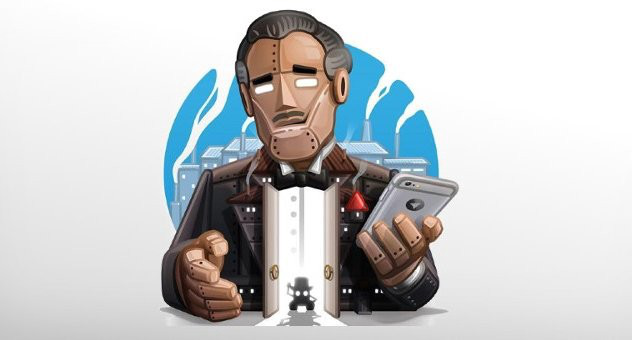

In [ ]:
from PIL import Image

botlogo = Image.open('botfather.jpeg')
display(botlogo)

### Installs

In [5]:
# via pip
!pip install -U python-telegram-bot
!pip install python-Levenshtein
!pip install investpy==0.9.2
!pip install gTTS
!pip install yfinance

# via conda
# conda install -c conda-forge python-telegram-bot
# conda install -c conda-forge python-levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado~=5.1.0, but you have tornado 6.2 which is incompatible.


### Bibliotecas

In [1]:
from telegram.bot import Bot
from telegram.update import Update
from telegram.ext import CommandHandler
from telegram.ext.updater import Updater
from telegram.ext.messagehandler import MessageHandler
from telegram.ext.filters import Filters
from telegram.chataction import ChatAction
from time import sleep

In [2]:
#bibliotecas financeiras
import investpy as inv # Empresas da B3
import yfinance as yf  # Dados financeiros (valor histórico das ações)

In [3]:
# Manipulação de dados
import numpy as np
import pandas as pd

# Visualização de dados
import plotly.graph_objects as go

# sintetização de voz
from gtts import gTTS

# tradução
# from deep_translator import GoogleTranslator
import re

### 1. Criar um bot no telegram

  - Abra o telegram e busque por ´BotFather´
  - Envie **/start** para iniciar o bot
  - Envie **/help** para conhecer as opções
  - Envie **/newbot** para criar um novo bot 
  - Escolha um nome
  - Escolha um **username**
  - Pronto! Seu bot está criado. Agora vamos programá-lo!


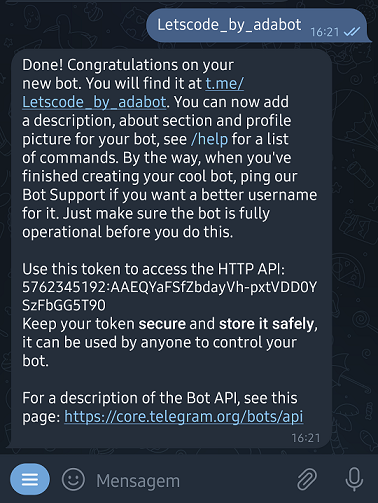

In [ ]:
tela = Image.open('tela.png')
display(tela)

In [4]:
BOT_TOKEN = '5770318855:AAFOzlMo85pr8tDt2ZsGJWW69Sa6dWsr2uQ'

bot = Bot(BOT_TOKEN)
print(bot.get_me())

updater = Updater(BOT_TOKEN, use_context = True)

{'is_bot': True, 'can_join_groups': True, 'id': 5770318855, 'first_name': 'Ada857', 'can_read_all_group_messages': False, 'supports_inline_queries': False, 'username': 'Ada857bot'}


### Chat ID

> https://api.telegram.org/bot5762345192:AAEQYaFSfZbdayVh-pxtVDD0YSzFbGG5T90/getUpdates

### 2. Aplicação

In [5]:
data = yf.download(tickers='BTC-USD', period='60D', interval='1H')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2022-07-04 00:00:00+00:00,19302.492188,19311.595703,19238.353516,19268.070312,19268.070312,0
2022-07-04 01:00:00+00:00,19267.144531,19267.144531,19155.513672,19204.994141,19204.994141,225614848
2022-07-04 02:00:00+00:00,19212.017578,19219.974609,19084.173828,19084.173828,19084.173828,205699072
2022-07-04 03:00:00+00:00,19081.876953,19112.925781,19063.066406,19112.833984,19112.833984,108796928
2022-07-04 04:00:00+00:00,19099.291016,19128.349609,19084.589844,19114.718750,19114.718750,0
...,...,...,...,...,...,...
2022-08-31 21:00:00+00:00,20206.451172,20235.119141,20189.757812,20230.945312,20230.945312,0
2022-08-31 22:00:00+00:00,20233.699219,20266.513672,20115.511719,20159.466797,20159.466797,0
2022-08-31 23:00:00+00:00,20158.642578,20159.494141,19996.185547,20049.882812,20049.882812,0
2022-09-01 00:00:00+00:00,20050.498047,20127.845703,19987.457031,19987.457031,19987.457031,36825088


In [6]:
def plot_finance(empresa):

    data = yf.download(tickers=empresa, period='60d', interval='1h')
    fig = go.Figure()

    fig.add_trace(go.Candlestick(
        x = data.index, 
        open = data.Open,
        low = data.Low,
        high = data.High,
        close = data.Close
    ))

    fig.update_layout(
        title = 'Histórico de ações',
        yaxis_title = 'Preço'
    )

    fig.write_image(empresa+'.png')

In [7]:
def plot_finance_com_data_e_frequencia(empresa, periodo, intervalo):

    data = yf.download(tickers=empresa, period=periodo, interval=intervalo)
    
    fig = go.Figure()

    fig.add_trace(go.Candlestick(
        x = data.index, 
        open = data.Open,
        low = data.Low,
        high = data.High,
        close = data.Close
    ))

    fig.update_layout(
        title = 'Histórico de ações',
        yaxis_title = 'Preço'
    )

    fig.write_image(f'./{empresa}.png')

### Aplicando NLP para pegar o ticker e frequência

In [8]:
message = 'MGLU3.SA por 1mo frequência 15m'

In [9]:
periodo = re.findall(r'por [\d]+[a-zA-Z]+', message)[0].split(' ')[-1]
ticker = message.split(' ')[0]
interval = re.findall(r'...', message)[0].split(' ')[-1]
print("ticker:", ticker, 'dias:', periodo)
data = yf.download(tickers=ticker, period=periodo, interval=interval)
data

ticker: MGLU3.SA dias: 1mo
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MGLU3.SA: Invalid input - interval=mgl is not supported. Valid intervals: , 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [10]:
def start(update, context):
    bot.send_message(chat_id = update.effective_chat.id, text='Digite uma empresa2:')

In [11]:
def boas_vindas(update, context):
    nome = update.message.text
    bot.send_message(chat_id = update.effective_chat.id, text = 'Boa noite, ' + nome)

In [12]:
############################
### CRIAR UMA REGEX AQUI ###
############################  
# Para identificar a frequência de amostragem do gráfico
def plot_com_data(update, context):
    mensagem = update.message.text
    # Pegando o ticker (precisa ser a primeira string da mensagem)
    empresa = message.split(' ')[0]
    # Garantindo que se o usuário não passar o "por `periodo`" não gere erro
    try:
      periodo = re.findall(r'por [\d]+[a-zA-Z]+', mensagem)[0].split(' ')[-1]
    except:
      periodo = "60d"

    # Garantindo que se o usuário não passar o "frequência `intervalo`" não gere erro
    try:
      intervalo = re.findall(r'...', mensagem)[0].split(' ')[-1]
    except:
      intervalo = '1H'

    plot_finance_com_data_e_frequencia(empresa, periodo, intervalo)
    
    bot.send_document(chat_id = update.effective_chat.id, document = open(f'./{empresa}.png', 'rb'))
    

In [13]:
def plot(update, context):
    empresa = update.message.text
    
    plot_finance(empresa)
    
    bot.send_document(chat_id = update.effective_chat.id, document = open(empresa+'.png', 'rb'))
    

In [14]:
def conversor_voz(update, context):
    mensagem = update.message.text
    
    traducao = GoogleTranslator(source='auto', target='pt').translate(mensagem)
    
    mensagem_voz = gTTS(text = traducao, lang='pt', slow=False)
    mensagem_voz.save('mensagem.mp3')
    
    bot.send_audio(chat_id = update.effective_chat.id, audio=open('mensagem.mp3', 'rb'))

In [15]:
dp = updater.dispatcher

dp.add_handler(CommandHandler('iniciar', start))
dp.add_handler(MessageHandler(Filters.text, plot_com_data))

In [16]:
updater.start_polling()